# <center>Titanic: Machine Learning from Disaster

Competition: https://www.kaggle.com/c/titanic

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

%matplotlib inline

## Data exploration

In [0]:
# import datasets
train = pd.read_csv('train.csv') # file train.csv
test = pd.read_csv('test.csv') # file test.csv

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Adams, Mr. John",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Shine, Miss. Ellen Natalia",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.shape, test.shape

((891, 12), (418, 11))

## Model  - First model

### Transorming the value of variable Sex to 0 or 1

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
def transform_sex(n):
  if n == 'female':
    return 1
  else:
    return 0

In [0]:
# create a new colunm Sex_bin
train['Sex_bin'] = train['Sex'].map(transform_sex)
test['Sex_bin'] = test['Sex'].map(transform_sex)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [0]:
# colunm to train
variables = ['Sex_bin', 'Age']

In [0]:
X = train[variables]
y = train['Survived'] # Variable Survived to predict

In [15]:
X.head()

,Sex_bin,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
X = X.fillna(-1)

In [18]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
X_predict = test[variables]
X_predict = X_predict.fillna(-1)
X_predict.head()

,Sex_bin,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [20]:
p = model.predict(X_predict)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Create the submission


In [21]:
# Create a file to send a Kaggle
submission = pd.Series(p, index = test['PassengerId'], name = 'Survived')
submission

PassengerId
892     0
893     1
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [0]:
submission.to_csv('first_model_submission.csv', header = True)

In [23]:
!head first_model_submission.csv

PassengerId,Survived
892,0
893,1
894,0
895,1
896,1
897,0
898,1
899,0
900,1


The score in Kaggle was 0.71770, worse then the original file gender_submission.csv with 0.76555

## Model - Second model

In [0]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((445, 2), (446, 2), (445,), (446,))

In [26]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
p = model.predict(X_test)

In [28]:
# testing the accuracy
np.mean(y_test == p)

0.7690582959641256

In [29]:
p = (X_test['Sex_bin'] == 1).astype(np.int64)
np.mean(y_test == p)

0.7825112107623319

### Cross-validation 1


In [30]:
results = []
for loop in range(10):
  print(f'Loop: {loop}')
  kf = KFold(2, shuffle=True, random_state=loop)

  for train_lines, test_lines in kf.split(X):
    print(f'Train: {train_lines.shape[0]}')
    print(f'Test: {test_lines.shape[0]}')

    X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
    y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)

    p = model.predict(X_test)

    accuracy = np.mean(y_test == p) 
    results.append(accuracy)
    print(f'Accuracy: {accuracy}')

Loop: 0
Train: 445
Test: 446
Accuracy: 0.7713004484304933
Train: 446
Test: 445
Accuracy: 0.7797752808988764
Loop: 1
Train: 445
Test: 446
Accuracy: 0.7443946188340808
Train: 446
Test: 445
Accuracy: 0.7955056179775281
Loop: 2
Train: 445
Test: 446
Accuracy: 0.7757847533632287
Train: 446
Test: 445
Accuracy: 0.7887640449438202
Loop: 3
Train: 445
Test: 446
Accuracy: 0.7533632286995515
Train: 446
Test: 445
Accuracy: 0.7573033707865169
Loop: 4
Train: 445
Test: 446
Accuracy: 0.7354260089686099
Train: 446
Test: 445
Accuracy: 0.7415730337078652
Loop: 5
Train: 445
Test: 446
Accuracy: 0.7219730941704036
Train: 446
Test: 445
Accuracy: 0.7056179775280899
Loop: 6
Train: 445
Test: 446
Accuracy: 0.7757847533632287
Train: 446
Test: 445
Accuracy: 0.7303370786516854
Loop: 7
Train: 445
Test: 446
Accuracy: 0.7040358744394619
Train: 446
Test: 445
Accuracy: 0.7348314606741573
Loop: 8
Train: 445
Test: 446
Accuracy: 0.7488789237668162
Train: 446
Test: 445
Accuracy: 0.7887640449438202
Loop: 9
Train: 445
Test: 446

In [31]:
 results

[0.7713004484304933,
 0.7797752808988764,
 0.7443946188340808,
 0.7955056179775281,
 0.7757847533632287,
 0.7887640449438202,
 0.7533632286995515,
 0.7573033707865169,
 0.7354260089686099,
 0.7415730337078652,
 0.7219730941704036,
 0.7056179775280899,
 0.7757847533632287,
 0.7303370786516854,
 0.7040358744394619,
 0.7348314606741573,
 0.7488789237668162,
 0.7887640449438202,
 0.7623318385650224,
 0.7842696629213484]

In [32]:
np.mean(results)

0.7550007557817302

### Cross-validation 2


In [33]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_lines, test_lines in kf.split(X):
  print(f'Train: {train_lines.shape[0]}')
  print(f'Test: {test_lines.shape[0]}')

  X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
  y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(X_train, y_train)

  p = model.predict(X_test)

  accuracy = np.mean(y_test == p) 
  results.append(accuracy)
  print(f'Accuracy: {accuracy}')

Train: 445
Test: 446
Accuracy: 0.7511210762331838
Train: 446
Test: 445
Accuracy: 0.7617977528089888
Train: 445
Test: 446
Accuracy: 0.7533632286995515
Train: 446
Test: 445
Accuracy: 0.7595505617977528
Train: 445
Test: 446
Accuracy: 0.7690582959641256
Train: 446
Test: 445
Accuracy: 0.7573033707865169
Train: 445
Test: 446
Accuracy: 0.7399103139013453
Train: 446
Test: 445
Accuracy: 0.7595505617977528
Train: 445
Test: 446
Accuracy: 0.7354260089686099
Train: 446
Test: 445
Accuracy: 0.797752808988764
Train: 445
Test: 446
Accuracy: 0.7690582959641256
Train: 446
Test: 445
Accuracy: 0.7640449438202247
Train: 445
Test: 446
Accuracy: 0.7757847533632287
Train: 446
Test: 445
Accuracy: 0.7573033707865169
Train: 445
Test: 446
Accuracy: 0.7556053811659192
Train: 446
Test: 445
Accuracy: 0.7640449438202247
Train: 445
Test: 446
Accuracy: 0.7443946188340808
Train: 446
Test: 445
Accuracy: 0.7595505617977528
Train: 445
Test: 446
Accuracy: 0.7533632286995515
Train: 446
Test: 445
Accuracy: 0.7640449438202247


In [34]:
results

[0.7511210762331838,
 0.7617977528089888,
 0.7533632286995515,
 0.7595505617977528,
 0.7690582959641256,
 0.7573033707865169,
 0.7399103139013453,
 0.7595505617977528,
 0.7354260089686099,
 0.797752808988764,
 0.7690582959641256,
 0.7640449438202247,
 0.7757847533632287,
 0.7573033707865169,
 0.7556053811659192,
 0.7640449438202247,
 0.7443946188340808,
 0.7595505617977528,
 0.7533632286995515,
 0.7640449438202247]

In [35]:
np.mean(results)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <a list of 10 Patch objects>)

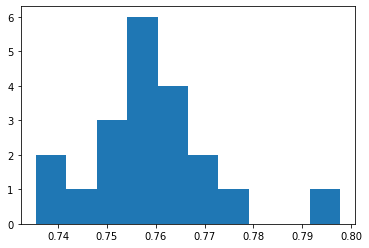

In [36]:
plt.hist(results)

In [0]:
# adding new variables to analysis
variables = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [0]:
X = train[variables].fillna(-1)
y = train['Survived']

In [39]:
X.head()

,Sex_bin,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [40]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_lines, test_lines in kf.split(X):
  print(f'Train: {train_lines.shape[0]}')
  print(f'Test: {test_lines.shape[0]}')

  X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
  y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(X_train, y_train)

  p = model.predict(X_test)

  accuracy = np.mean(y_test == p) 
  results.append(accuracy)
  print(f'Accuracy: {accuracy}')

Train: 445
Test: 446
Accuracy: 0.7869955156950673
Train: 446
Test: 445
Accuracy: 0.7797752808988764
Train: 445
Test: 446
Accuracy: 0.827354260089686
Train: 446
Test: 445
Accuracy: 0.8179775280898877
Train: 445
Test: 446
Accuracy: 0.7847533632286996
Train: 446
Test: 445
Accuracy: 0.7842696629213484
Train: 445
Test: 446
Accuracy: 0.8161434977578476
Train: 446
Test: 445
Accuracy: 0.7842696629213484
Train: 445
Test: 446
Accuracy: 0.8004484304932735
Train: 446
Test: 445
Accuracy: 0.8
Train: 445
Test: 446
Accuracy: 0.8183856502242153
Train: 446
Test: 445
Accuracy: 0.802247191011236
Train: 445
Test: 446
Accuracy: 0.8116591928251121
Train: 446
Test: 445
Accuracy: 0.8067415730337079
Train: 445
Test: 446
Accuracy: 0.820627802690583
Train: 446
Test: 445
Accuracy: 0.7887640449438202
Train: 445
Test: 446
Accuracy: 0.8385650224215246
Train: 446
Test: 445
Accuracy: 0.8044943820224719
Train: 445
Test: 446
Accuracy: 0.7982062780269058
Train: 446
Test: 445
Accuracy: 0.8112359550561797


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <a list of 10 Patch objects>)

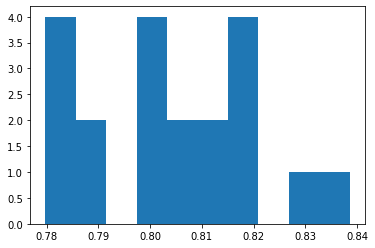

In [41]:
plt.hist(results)

In [42]:
test[variables].head()

,Sex_bin,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [0]:
# retraining the data to create a new sibmission

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)

p = model.predict(test[variables].fillna(-1))

In [44]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
# Create a file to send a Kaggle
submission = pd.Series(p, index = test['PassengerId'], name = 'Survived')
submission

PassengerId
892     0
893     0
894     1
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [0]:
submission.to_csv('second_submission.csv', header=True)

In [47]:
!head second_submission.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1


## Model - Tird model

### Error analysis

In [48]:
results = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_lines, test_lines in kf.split(X):
  print(f'Train: {train_lines.shape[0]}')
  print(f'Test: {test_lines.shape[0]}')

  X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
  y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(X_train, y_train)

  p = model.predict(X_test)

  accuracy = np.mean(y_test == p) 
  results.append(accuracy)
  print(f'Accuracy: {accuracy}')

Train: 445
Test: 446
Accuracy: 0.7869955156950673
Train: 446
Test: 445
Accuracy: 0.7797752808988764
Train: 445
Test: 446
Accuracy: 0.827354260089686
Train: 446
Test: 445
Accuracy: 0.8179775280898877
Train: 445
Test: 446
Accuracy: 0.7847533632286996
Train: 446
Test: 445
Accuracy: 0.7842696629213484
Train: 445
Test: 446
Accuracy: 0.8161434977578476
Train: 446
Test: 445
Accuracy: 0.7842696629213484
Train: 445
Test: 446
Accuracy: 0.8004484304932735
Train: 446
Test: 445
Accuracy: 0.8
Train: 445
Test: 446
Accuracy: 0.8183856502242153
Train: 446
Test: 445
Accuracy: 0.802247191011236
Train: 445
Test: 446
Accuracy: 0.8116591928251121
Train: 446
Test: 445
Accuracy: 0.8067415730337079
Train: 445
Test: 446
Accuracy: 0.820627802690583
Train: 446
Test: 445
Accuracy: 0.7887640449438202
Train: 445
Test: 446
Accuracy: 0.8385650224215246
Train: 446
Test: 445
Accuracy: 0.8044943820224719
Train: 445
Test: 446
Accuracy: 0.7982062780269058
Train: 446
Test: 445
Accuracy: 0.8112359550561797


In [49]:
X_test_check = train.iloc[test_lines].copy()
X_test_check['p'] = p
X_test_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [50]:
X_test_check.shape

(445, 14)

In [51]:
errors = X_test_check[X_test_check['Survived'] != X_test_check['p']]
errors = errors[['PassengerId',	'Pclass',	'Name',	'Sex',	'Age',	'SibSp',
                 'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked',	'Sex_bin',	
                 'p', 'Survived']]
errors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [0]:
women = errors[errors['Sex'] == 'female']
men = errors[errors['Sex'] == 'male']

In [53]:
women.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [54]:
men.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


### New variables again


In [0]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabin_Null'] = train['Cabin'].isnull().astype(int)

train['Name_with_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Name_with_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Name_with_Master'] = train['Name'].str.contains('Master').astype(int)
train['Name_with_Col'] = train['Name'].str.contains('Col').astype(int)
train['Name_with_Major'] = train['Name'].str.contains('Major').astype(int)
train['Name_with_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_bin', 'Embarked_S',
       'Embarked_C', 'Cabin_Null', 'Name_with_Miss', 'Name_with_Mrs',
       'Name_with_Master', 'Name_with_Col', 'Name_with_Major', 'Name_with_Mr'],
      dtype='object')

In [0]:
variables = ['Sex_bin', 'Age', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 
             'Cabin_Null', 'Name_with_Miss', 'Name_with_Mrs',
             'Name_with_Master', 'Name_with_Col', 'Name_with_Major', 'Name_with_Mr']
X = train[variables].fillna(-1)
y = train['Survived']

In [58]:
X.head()

,Sex_bin,Age,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Cabin_Null,Name_with_Miss,Name_with_Mrs,Name_with_Master,Name_with_Col,Name_with_Major,Name_with_Mr
0,0,22.0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,0,1
1,1,38.0,1,38.0,1,0,71.2833,0,1,0,0,1,0,0,0,1
2,1,26.0,3,26.0,0,0,7.9250,1,0,1,1,0,0,0,0,0
3,1,35.0,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1
4,0,35.0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,0,1


In [59]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
X.shape

(891, 16)

In [61]:
X.dtypes

Sex_bin               int64
Age                 float64
Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked_S            int64
Embarked_C            int64
Cabin_Null            int64
Name_with_Miss        int64
Name_with_Mrs         int64
Name_with_Master      int64
Name_with_Col         int64
Name_with_Major       int64
Name_with_Mr          int64
dtype: object

In [62]:
results_two = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_lines, test_lines in kf.split(X):
  print(f'Train: {train_lines.shape[0]}')
  print(f'Test: {test_lines.shape[0]}')

  X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
  y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

  model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
  model.fit(X_train, y_train)

  p = model.predict(X_test)

  accuracy = np.mean(y_test == p) 
  results_two.append(accuracy)
  print(f'Accuracy: {accuracy}')

Train: 445
Test: 446
Accuracy: 0.7869955156950673
Train: 446
Test: 445
Accuracy: 0.7932584269662921
Train: 445
Test: 446
Accuracy: 0.8116591928251121
Train: 446
Test: 445
Accuracy: 0.7887640449438202
Train: 445
Test: 446
Accuracy: 0.8116591928251121
Train: 446
Test: 445
Accuracy: 0.797752808988764
Train: 445
Test: 446
Accuracy: 0.8139013452914798
Train: 446
Test: 445
Accuracy: 0.8
Train: 445
Test: 446
Accuracy: 0.7982062780269058
Train: 446
Test: 445
Accuracy: 0.8044943820224719
Train: 445
Test: 446
Accuracy: 0.8071748878923767
Train: 446
Test: 445
Accuracy: 0.8
Train: 445
Test: 446
Accuracy: 0.820627802690583
Train: 446
Test: 445
Accuracy: 0.8044943820224719
Train: 445
Test: 446
Accuracy: 0.7892376681614349
Train: 446
Test: 445
Accuracy: 0.8134831460674158
Train: 445
Test: 446
Accuracy: 0.8340807174887892
Train: 446
Test: 445
Accuracy: 0.8179775280898877
Train: 445
Test: 446
Accuracy: 0.8071748878923767
Train: 446
Test: 445
Accuracy: 0.8247191011235955


((array([3., 1., 4., 2., 2., 4., 1., 1., 1., 1.]),
  array([0.78699552, 0.79170404, 0.79641256, 0.80112108, 0.8058296 ,
         0.81053812, 0.81524664, 0.81995516, 0.82466368, 0.8293722 ,
         0.83408072]),
  <a list of 10 Patch objects>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <a list of 10 Patch objects>))

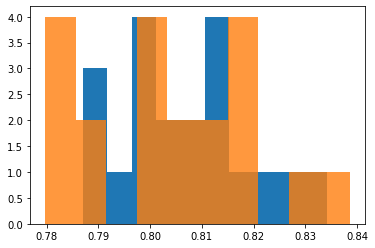

In [63]:
plt.hist(results_two), plt.hist(results,alpha=0.8) # blue is new model and orange model before

In [0]:
model_before = 0.8041457147175896

In [65]:
np.mean(results_two) 

0.8062830654506976

In [0]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_Null'] = test['Cabin'].isnull().astype(int)

test['Name_with_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Name_with_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Name_with_Master'] = test['Name'].str.contains('Master').astype(int)
test['Name_with_Col'] = test['Name'].str.contains('Col').astype(int)
test['Name_with_Major'] = test['Name'].str.contains('Major').astype(int)
test['Name_with_Mr'] = test['Name'].str.contains('Mr').astype(int)

In [0]:
# retraining the data to create a new sibmission

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X, y)

p = model.predict(test[variables].fillna(-1))

In [68]:
p

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
# Create a file to send a Kaggle
submission = pd.Series(p, index = test['PassengerId'], name = 'Survived')
submission

PassengerId
892     0
893     0
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

In [0]:
submission.to_csv('third_submission.csv', header=True)

In [71]:
!head third_submission.csv

PassengerId,Survived
892,0
893,0
894,0
895,1
896,1
897,0
898,0
899,0
900,1


## Changing the model


In [0]:
warnings.filterwarnings('ignore')

In [73]:
results_two = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for train_lines, test_lines in kf.split(X):
  print(f'Train: {train_lines.shape[0]}')
  print(f'Test: {test_lines.shape[0]}')

  X_train, X_test = X.iloc[train_lines], X.iloc[test_lines]
  y_train, y_test = y.iloc[train_lines], y.iloc[test_lines]

  model = LogisticRegression()
  model.fit(X_train, y_train)

  p = model.predict(X_test)

  accuracy = np.mean(y_test == p) 
  results_two.append(accuracy)
  print(f'Accuracy: {accuracy}')

Train: 445
Test: 446
Accuracy: 0.8340807174887892
Train: 446
Test: 445
Accuracy: 0.8067415730337079
Train: 445
Test: 446
Accuracy: 0.8116591928251121
Train: 446
Test: 445
Accuracy: 0.797752808988764
Train: 445
Test: 446
Accuracy: 0.8161434977578476
Train: 446
Test: 445
Accuracy: 0.8179775280898877
Train: 445
Test: 446
Accuracy: 0.8139013452914798
Train: 446
Test: 445
Accuracy: 0.8157303370786517
Train: 445
Test: 446
Accuracy: 0.8251121076233184
Train: 446
Test: 445
Accuracy: 0.8179775280898877
Train: 445
Test: 446
Accuracy: 0.827354260089686
Train: 446
Test: 445
Accuracy: 0.8157303370786517
Train: 445
Test: 446
Accuracy: 0.8408071748878924
Train: 446
Test: 445
Accuracy: 0.8
Train: 445
Test: 446
Accuracy: 0.8071748878923767
Train: 446
Test: 445
Accuracy: 0.8112359550561797
Train: 445
Test: 446
Accuracy: 0.8363228699551569
Train: 446
Test: 445
Accuracy: 0.8134831460674158
Train: 445
Test: 446
Accuracy: 0.8318385650224215
Train: 446
Test: 445
Accuracy: 0.8247191011235955


((array([2., 0., 2., 4., 5., 0., 3., 1., 2., 1.]),
  array([0.79775281, 0.80205825, 0.80636368, 0.81066912, 0.81497456,
         0.81927999, 0.82358543, 0.82789087, 0.8321963 , 0.83650174,
         0.84080717]),
  <a list of 10 Patch objects>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <a list of 10 Patch objects>))

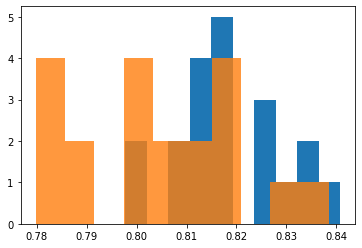

In [74]:
plt.hist(results_two), plt.hist(results,alpha=0.8) # blue is new model and orange model before

In [0]:
model_before = 0.8062830654506976

In [76]:
np.mean(results_two) 

0.8182871466720412

In [0]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabin_Null'] = test['Cabin'].isnull().astype(int)

test['Name_with_Miss'] = test['Name'].str.contains('Miss').astype(int)
test['Name_with_Mrs'] = test['Name'].str.contains('Mrs').astype(int)

test['Name_with_Master'] = test['Name'].str.contains('Master').astype(int)
test['Name_with_Col'] = test['Name'].str.contains('Col').astype(int)
test['Name_with_Major'] = test['Name'].str.contains('Major').astype(int)
test['Name_with_Mr'] = test['Name'].str.contains('Mr').astype(int)

In [0]:
# retraining the data to create a new sibmission

model = LogisticRegression()
model.fit(X, y)

p = model.predict(test[variables].fillna(-1))

In [79]:
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
# Create a file to send a Kaggle
submission = pd.Series(p, index = test['PassengerId'], name = 'Survived')
submission

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64

In [0]:
submission.to_csv('fourth_submission.csv', header=True)

In [82]:
!head fourth_submission.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


The score was major then the baseline: 0.77990